In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = 15,40

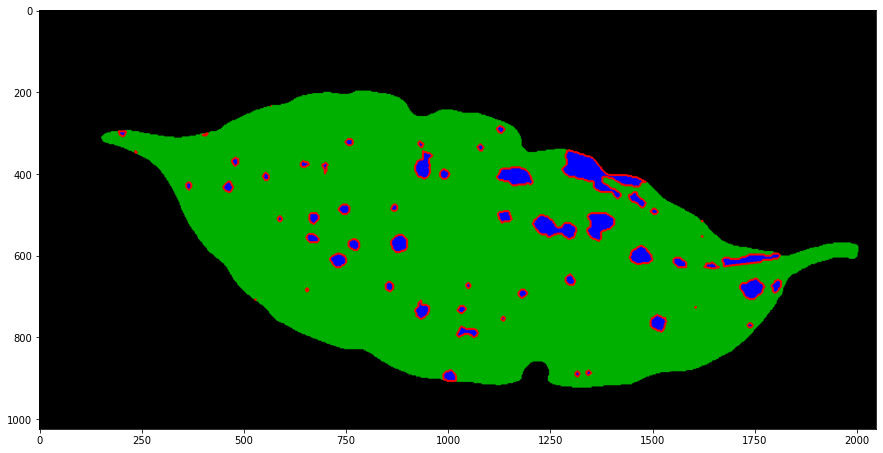

In [2]:
# por imagem
original = cv.imread('146_mask.png')
red = np.array([0,0,255])
mask = cv.inRange(original, red, red)
plt.imshow(mask)
contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
mask2 = mask
cv.drawContours(original, contours, -1, (255,0,0), 3)
cv.imwrite('test.png', original)
plt.imshow(original)

In [3]:
data = {}
data['info'] = {
        "year": "2022",
        "version": "1",
        "description": "Exported from roboflow.ai",
        "contributor": "",
        "url": "https://public.roboflow.ai/object-detection/undefined",
        "date_created": "2022-07-21T03:05:36+00:00"
},


data["images"] = []

  
data["annotations"] = []
data["licenses"] = [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ]
data["categories"] = []
data["categories"].append({
  "supercategory": "sympton",
  "id": 1,
  "name": "miner"
})
data["categories"].append({
  "supercategory": "sympton",
  "id": 2,
  "name": "rust"
})
data["categories"].append({
  "supercategory": "sympton",
  "id": 3,
  "name": "phoma"
})
data["categories"].append({
  "supercategory": "sympton",
  "id": 4,
  "name": "cercospora"
})

In [4]:
df = pd.read_csv('dataset.csv')
filtered = df[((df['miner']==1)&(df['rust']==0)&(df['phoma']==0)&(df['cercospora']==0))|
((df['miner']==0)&(df['rust']==1)&(df['phoma']==0)&(df['cercospora']==0))|
((df['miner']==0)&(df['rust']==0)&(df['phoma']==1)&(df['cercospora']==0))|
((df['miner']==0)&(df['rust']==0)&(df['phoma']==0)&(df['cercospora']==1))|
((df['miner']==0)&(df['rust']==0)&(df['phoma']==0)&(df['cercospora']==0))]
novo = filtered.drop(columns=['predominant_stress', 'severity']).set_index('id')

In [7]:
import shutil
import glob
files = glob.glob('test/*.png')

origin = r'C:\Users\Guilherme Rodrigues\Desktop\TCC\Artigos\datasets\bracol\segmentation\images\test'
final = r'C:\Users\Guilherme Rodrigues\Desktop\TCC\Artigos\datasets\bracol\segmentation\annotations\copiasTrain'

file_id = 0
anot_id = 0
for file in files:
  new = file[5:].replace('_mask', '').replace('.png', '.jpg')
  id = int(new.replace('.jpg', ''))
  if id in novo.index:
    original = cv.imread(file)
    red = np.array([0,0,255])
    mask = cv.inRange(original, red, red)

    contours = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
    shutil.copy(origin + f'\{new}', final + f"\{new}")
    data["images"].append({
      "id": file_id,
      "file_name": f'{new}',
      "license": 1,
      "date_captured": "2022-07-21T03:05:36+00:00",
      "width": 2048,
      "height": 1024
    })
    if len(contours) > 0:
      for contour in contours:
        if(len(contour.flatten().tolist()) < 5):
          print('muito pequenoooo')
        else:
          data['annotations'].append(
            {
              "id": anot_id,
              "image_id": file_id,
              "category_id": int(np.where(novo.loc[id].values == 1)[0][0] + 1),
              "segmentation": [contour.flatten().tolist()],
              "bbox": cv.boundingRect(contour),
              "area": cv.contourArea(contour),
              "iscrowd": 0
            }
          )
          anot_id += 1
    file_id+=1



In [154]:
data

{'info': ({'year': '2022',
   'version': '1',
   'description': 'Exported from roboflow.ai',
   'contributor': '',
   'url': 'https://public.roboflow.ai/object-detection/undefined',
   'date_created': '2022-07-21T03:05:36+00:00'},),
 'images': [{'id': 0,
   'file_name': '1001.jpg',
   'license': 1,
   'date_captured': '2022-07-21T03:05:36+00:00',
   'width': 2048,
   'height': 1024},
  {'id': 1,
   'file_name': '1002.jpg',
   'license': 1,
   'date_captured': '2022-07-21T03:05:36+00:00',
   'width': 2048,
   'height': 1024},
  {'id': 2,
   'file_name': '1006.jpg',
   'license': 1,
   'date_captured': '2022-07-21T03:05:36+00:00',
   'width': 2048,
   'height': 1024},
  {'id': 3,
   'file_name': '1007.jpg',
   'license': 1,
   'date_captured': '2022-07-21T03:05:36+00:00',
   'width': 2048,
   'height': 1024},
  {'id': 4,
   'file_name': '1010.jpg',
   'license': 1,
   'date_captured': '2022-07-21T03:05:36+00:00',
   'width': 2048,
   'height': 1024},
  {'id': 5,
   'file_name': '1018.jpg

In [155]:
import json

json.dump(data, open('train_annotations_coco.json', 'w'))

In [ ]:
import glob
files = glob.glob('val/*.png')
import shutil

origin = r'C:\Users\Guilherme Rodrigues\Desktop\TCC\Artigos\datasets\bracol\segmentation\images\val'
final = r'C:\Users\Guilherme Rodrigues\Desktop\TCC\Artigos\datasets\bracol\segmentation\annotations\copias'
for file in files:
    new = file[4:].replace('_mask', '').replace('.png', '.jpg')
    shutil.copy(origin + f'\{new}', final + f"\{new}")

In [ ]:
import cv2
import numpy as np
from pycocotools import mask

segmentation= mask.decode(segmentation)